# Importation des librairies

In [1]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\HP 840 G3\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Nettoyage et préparation des données

### Importation des données

In [2]:
df=pd.read_csv("USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


### Recherche des valeurs manquantes

In [3]:
# Trouver le nombre de valeurs manquantes par colonne
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

### Recherche des doublons

In [4]:
# Rechercher les doublons dans notre ensemble de données
df[df.duplicated()]


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


### Types des données

In [5]:
# Afficher le type de chaque colonne et le nombre d'éléments de la colonne
df.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

### Suppression des colonnes inutiles

In [6]:
# Suppression de colonnes Adress
df=df.drop("Address", axis=1)

In [7]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


# Analyse exploratoire des données

### Statistique descriptive sur les données.

In [8]:
# Statistique descriptives sur les données
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


### Distribution des variables

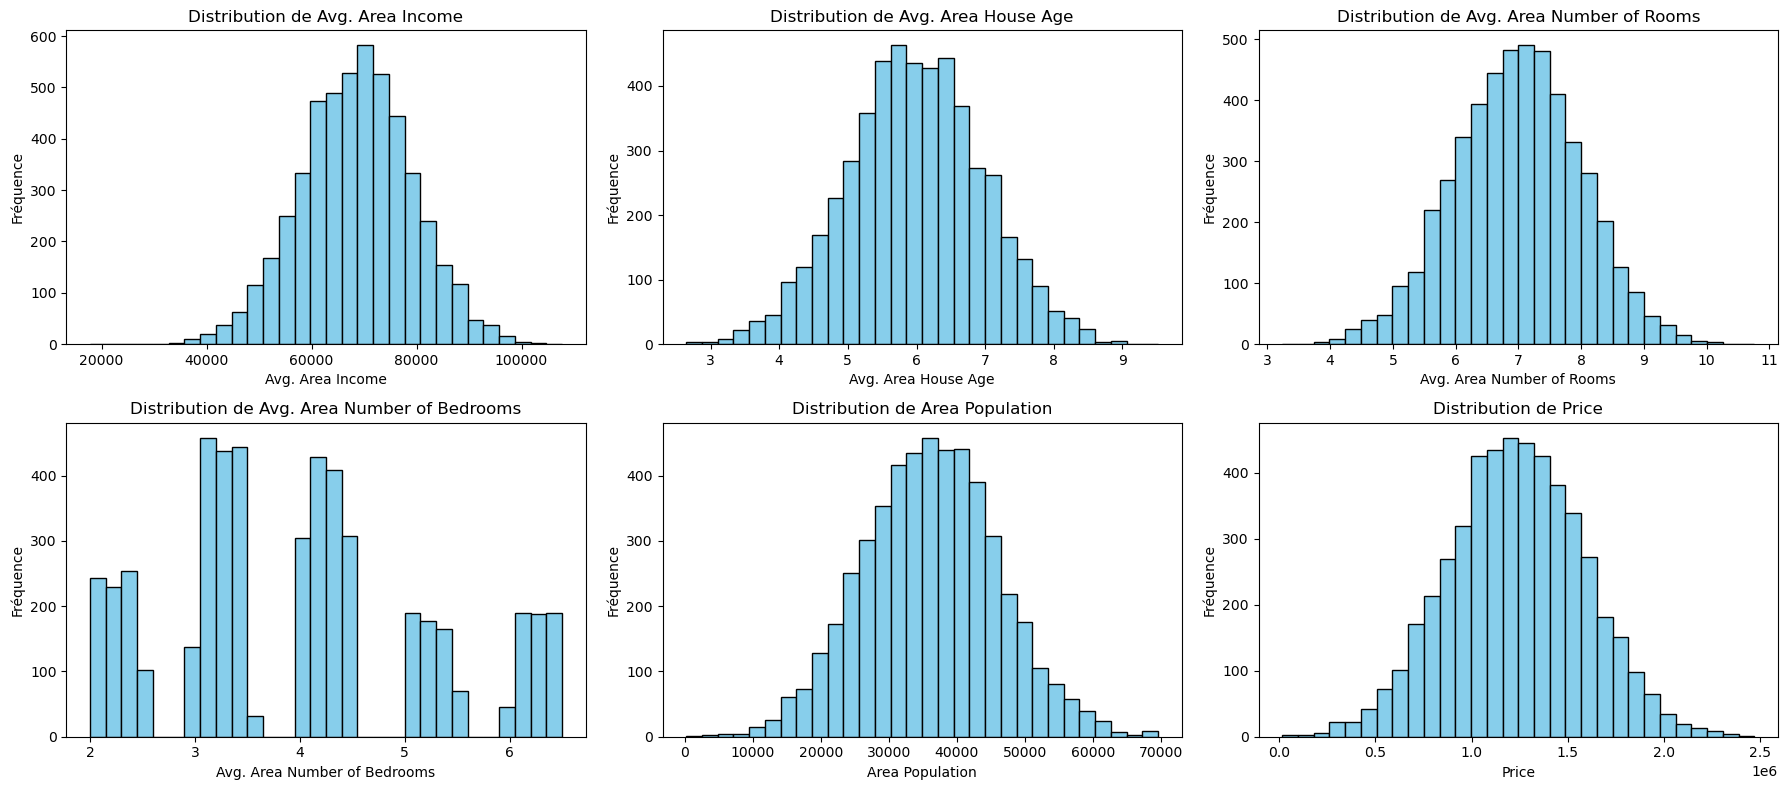

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
# Aplatir les axes pour itérer facilement
axes = axes.flatten()
# Créer les histogrammes dans chaque sous-graphe
for i, var in enumerate(df):
    axes[i].hist(df[var], bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Fréquence')

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

### Boxplot des variables

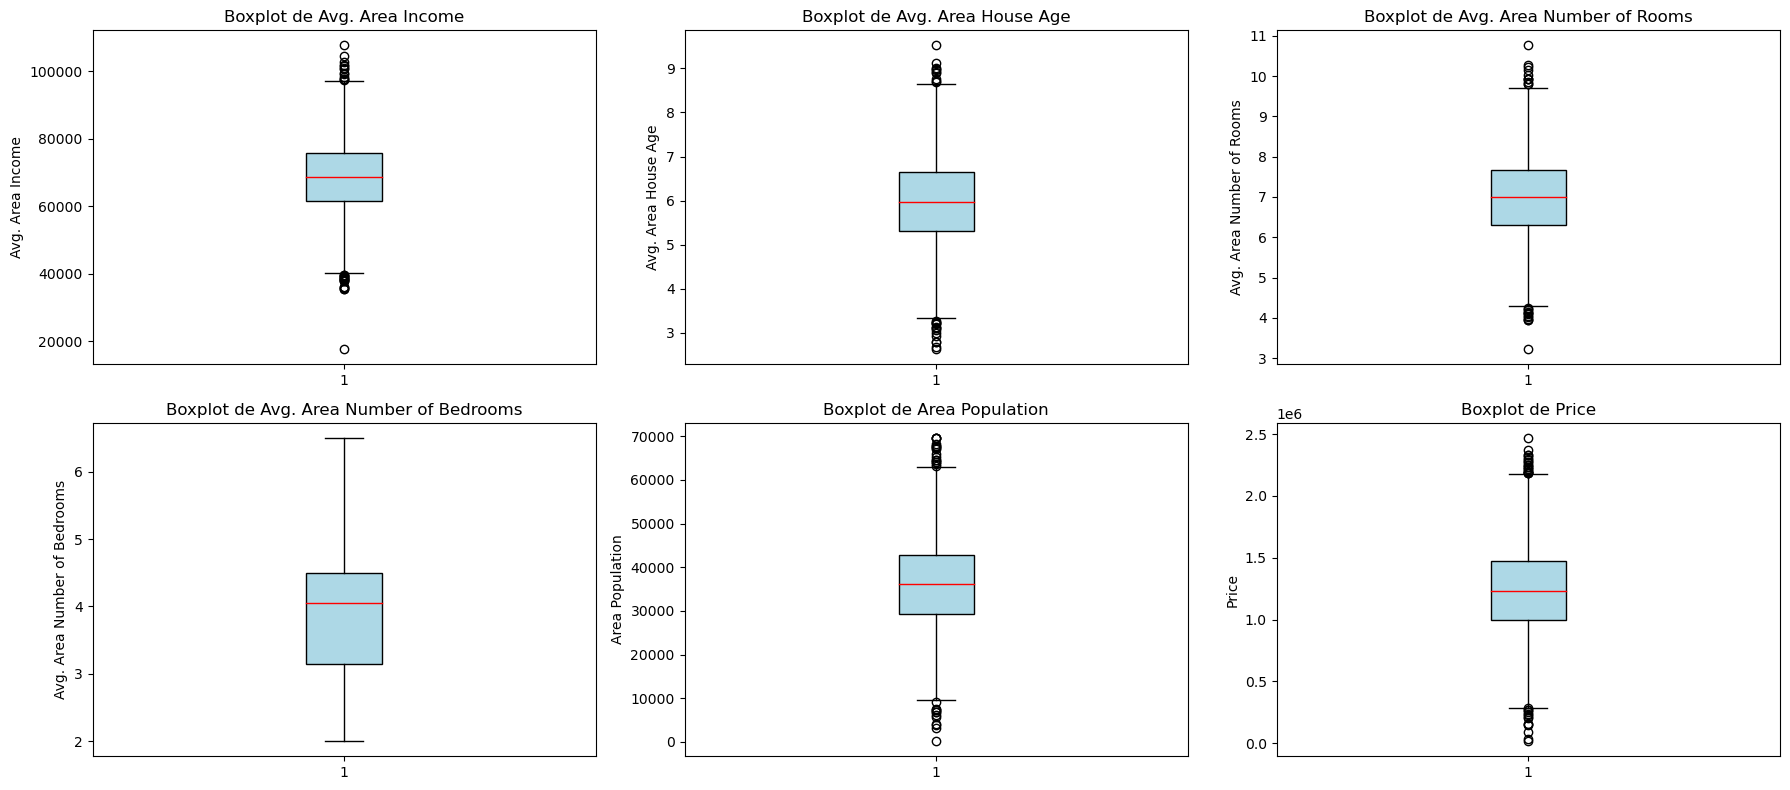

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Aplatir les axes pour itérer facilement
axes = axes.flatten()

# Créer les boxplots dans chaque sous-graphe 
for i, var in enumerate(df):
    axes[i].boxplot(df[var].dropna(), vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red'))
    axes[i].set_title(f'Boxplot de {var}')
    axes[i].set_ylabel(var)

# Retirer les axes vides s’il y en a
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Ajuster l’espacement entre les subplots
plt.tight_layout()
plt.show()

### Analyse graphique des corrélations

In [11]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


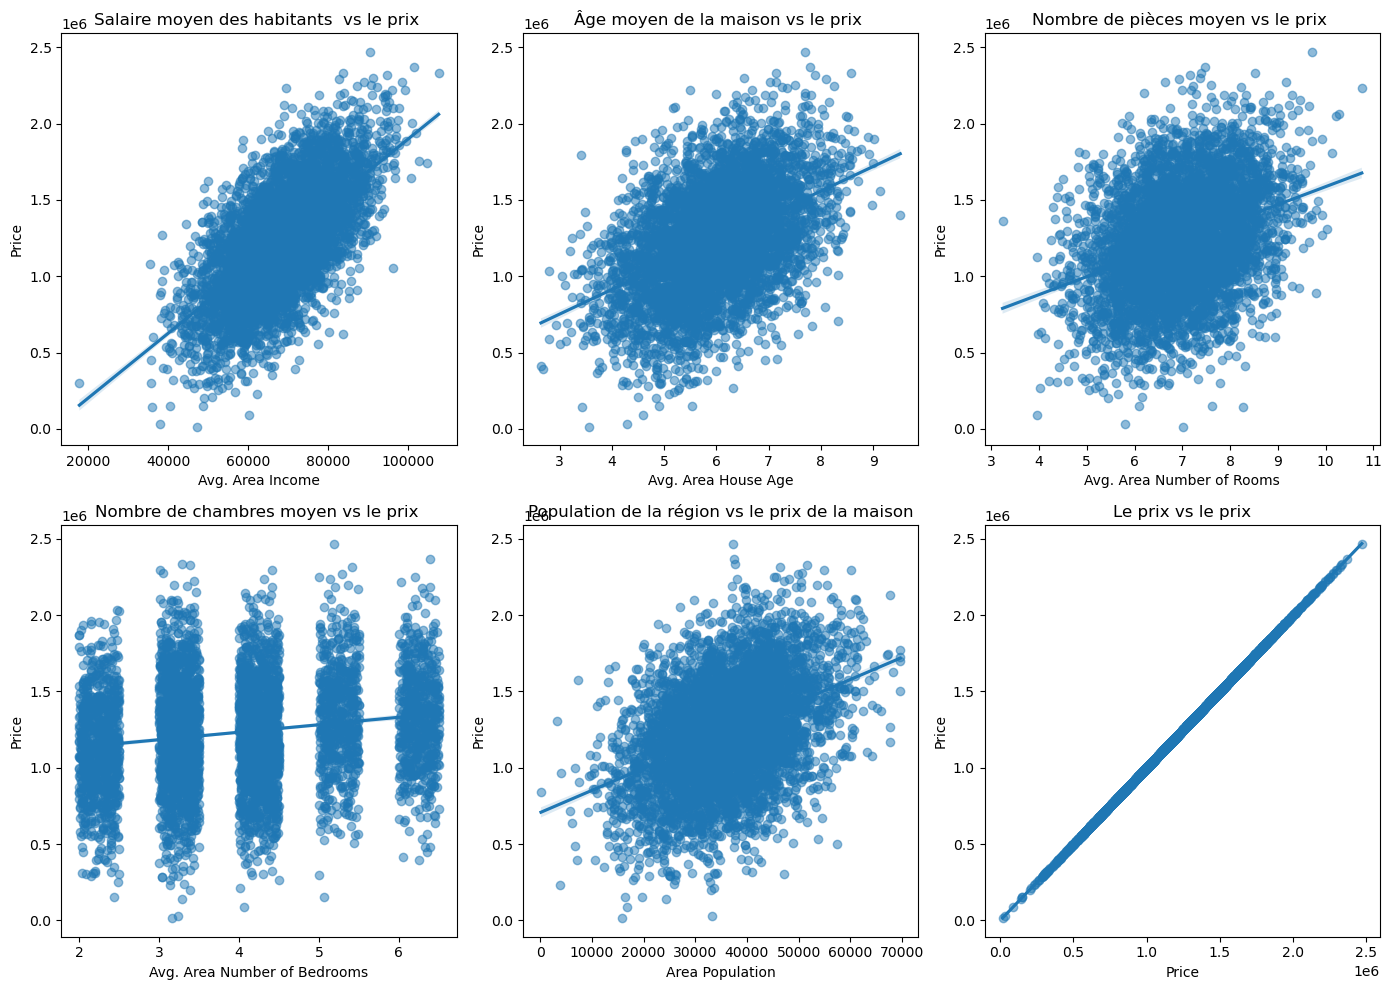

In [12]:
# Définir la taille de la grille de sous-graphiques
fig, axes = plt.subplots(2, 3, figsize=(14, 10))

# Avg. Area Income vs Price
sns.regplot(data=df, x='Avg. Area Income', y='Price', ax=axes[0, 0], scatter_kws={'alpha': 0.5})
axes[0, 0].set_title('Salaire moyen des habitants  vs le prix ')

# Avg. Area House Age vs Price
sns.regplot(data=df, x='Avg. Area House Age', y='Price', ax=axes[0, 1], scatter_kws={'alpha': 0.5})
axes[0, 1].set_title("Âge moyen de la maison vs le prix ")

# Avg. Area Number of Rooms vs Price
sns.regplot(data=df, x='Avg. Area Number of Rooms', y='Price', ax=axes[0, 2], scatter_kws={'alpha': 0.5})
axes[0, 2].set_title('Nombre de pièces moyen vs le prix ')

# Avg. Area Number of Bedrooms vs Price
sns.regplot(data=df, x='Avg. Area Number of Bedrooms', y='Price', ax=axes[1, 0], scatter_kws={'alpha': 0.5})
axes[1, 0].set_title('Nombre de chambres moyen vs le prix ')

# Area Population vs Price
sns.regplot(data=df, x='Area Population', y='Price', ax=axes[1, 1], scatter_kws={'alpha': 0.5})
axes[1, 1].set_title('Population de la région vs le prix de la maison')

# Price vs Price
sns.regplot(data=df, x='Price', y='Price', ax=axes[1, 2], scatter_kws={'alpha': 0.5})
axes[1, 2].set_title('Le prix vs le prix')

# Ajuster les espacements
plt.tight_layout()
plt.show()


### Matrice de corrélation

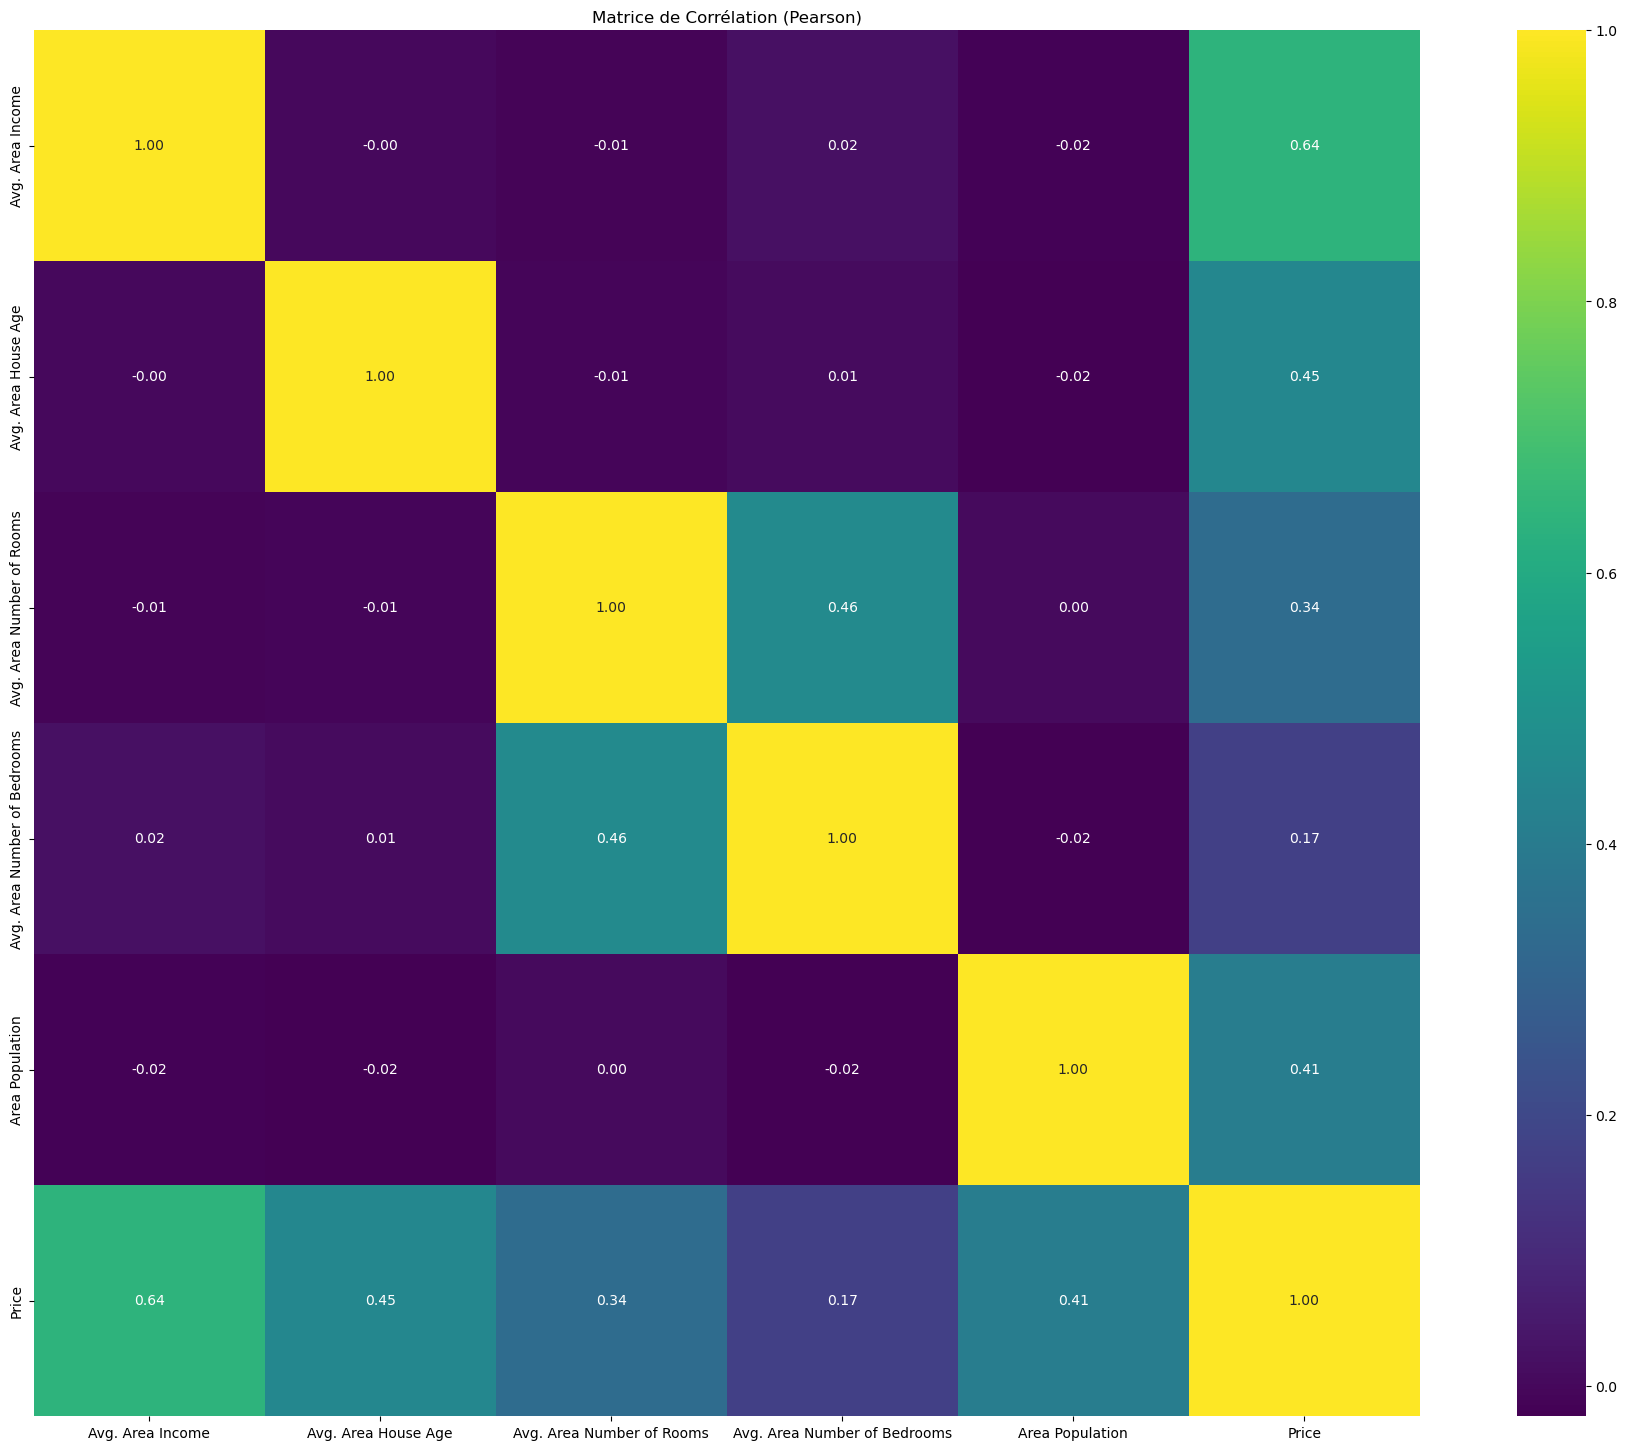

In [13]:
# Matrice de corrélation de Pearson
spearman_corr = df.corr()

# Affichage de la heatmap
plt.figure(figsize=(25, 18))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='viridis', square=True)
plt.title('Matrice de Corrélation (Pearson)')
plt.show()

### Classement des variables en fonction des corrélation avec la variable Prix

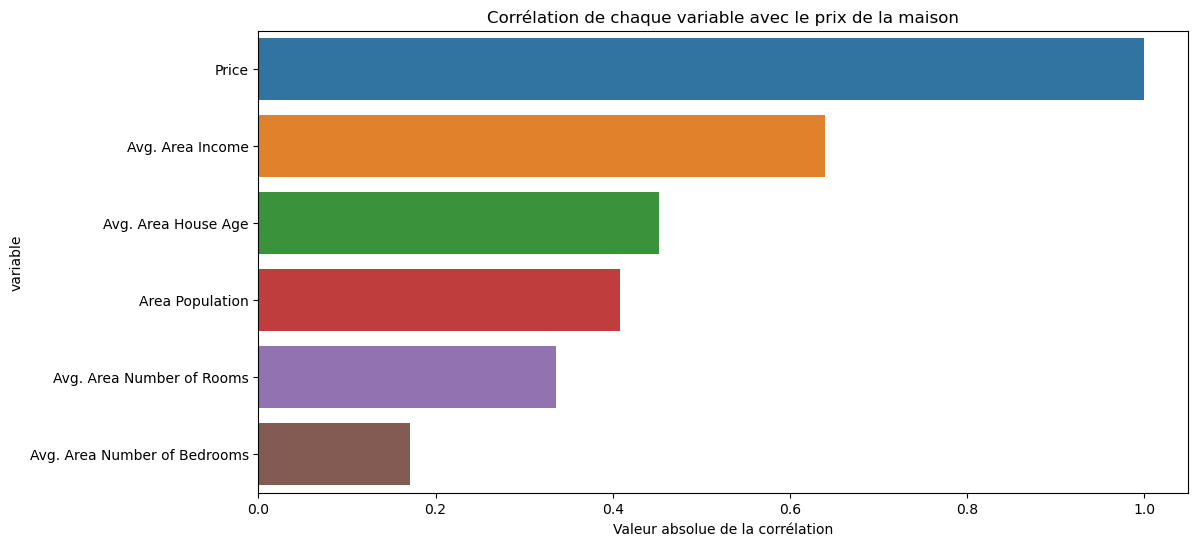

In [14]:
# Calcul de la corrélation entre chaque variable et la variable cible ou variable à prédire
correlation=abs(df.corr()["Price"]).sort_values(ascending=False)

# Répresentation graphique des corrélations
plt.figure(figsize=(12,6))
sns.barplot(x=correlation.values, y=correlation.index)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("variable")
plt.title("Corrélation de chaque variable avec le prix de la maison")
plt.show()

### Division de la base en Train et Test

In [16]:
# Diviser les données en ensemble d'entrainement(Train) et test (Test)
train, test= train_test_split(df, test_size=0.2, random_state=42)
train

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
4227,66547.016454,5.846095,6.847298,4.13,27850.822901,1.094880e+06
4676,53722.008599,6.401391,7.787764,3.30,47649.224665,1.300389e+06
800,64838.492899,6.437157,8.699544,4.02,32921.010068,1.382172e+06
3671,67097.092120,6.086754,7.211963,3.05,27191.506877,1.027428e+06
4193,75245.465436,8.167820,7.420100,3.42,37410.669928,1.562887e+06
...,...,...,...,...,...,...
4426,76223.561256,6.371627,5.342217,2.42,30165.337445,1.023944e+06
466,56685.014442,6.958045,7.502115,3.38,43322.166854,1.223101e+06
3092,66195.337714,6.507971,6.611861,3.14,37288.923574,1.318598e+06
3772,58694.515017,7.394768,9.269453,4.32,49960.977236,1.708631e+06


# Modélisation des données sur la base train

### Séparation des variables prédictives et la variable cible.

In [18]:
# Séparation des variables prédictives et la variable cible.
x_train= train.drop("Price", axis=1)
y_train= train["Price"]

x_test= test.drop("Price", axis=1)
y_test= test["Price"]

# fit du modèle linéaire
lr_model= sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Obtention du tableau de résultats
table_results= lr_model.summary2().tables[1]
table_results


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-2.635073e+06,19196.093303,-137.271311,0.000000,-2.672708e+06,-2.597438e+06
Avg. Area Income,2.165221e+01,0.149834,144.508054,0.000000,2.135845e+01,2.194596e+01
Avg. Area House Age,1.646665e+05,1613.612783,102.048324,0.000000,1.615029e+05,1.678301e+05
Avg. Area Number of Rooms,1.196240e+05,1794.398252,66.665252,0.000000,1.161060e+05,1.231420e+05
Avg. Area Number of Bedrooms,2.440378e+03,1477.302480,1.651915,0.098631,-4.559598e+02,5.336715e+03
Area Population,1.527031e+01,0.160827,94.948910,0.000000,1.495500e+01,1.558562e+01


### Significativité globale du model

In [20]:
lr_model.summary2().tables[0]

,0,1,2,3
0,Model:,OLS,Adj. R-squared:,0.918
1,Dependent Variable:,Price,AIC:,103568.1476
2,Date:,2025-05-13 12:06,BIC:,103605.9119
3,No. Observations:,4000,Log-Likelihood:,-51778.
4,Df Model:,5,F-statistic:,8940.
5,Df Residuals:,3994,Prob (F-statistic):,0.00
6,R-squared:,0.918,Scale:,1.0272e+10


In [21]:
# Obtention des prédictions et des métriques sur la d'évaluation
y_train_pred=lr_model.predict(sm.add_constant(x_train))
y_test_pred= lr_model.predict(sm.add_constant(x_test))
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)
mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)
rmse_train= np.sqrt(mse_train)
rmse_test= np.sqrt(mse_test)

In [22]:
# Construction du tableau des résultats
df_metrics= pd.DataFrame({
    "Métrique": ["R2","MSE", "RMSE"],
    "Train": [r2_train, mse_train, rmse_train],
    "Test": [r2_test, mse_test, rmse_test]
})
print(df_metrics)

  Métrique         Train          Test
0       R2  9.179787e-01  9.179972e-01
1      MSE  1.025632e+10  1.008901e+10
2     RMSE  1.012735e+05  1.004441e+05


### Représentation graphique pour observer les valeurs prédites en fonctioin des valeurs observées

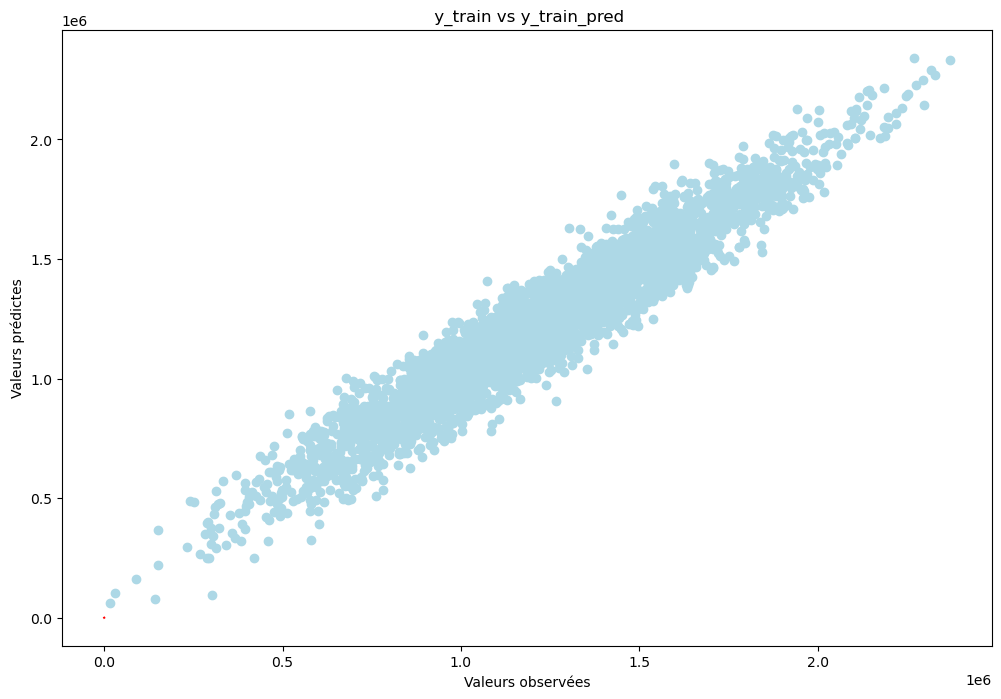

In [26]:
plt.figure(figsize=(12,8))
plt.scatter(y_train, y_train_pred, color="lightblue")
plt.xlabel("Valeurs observées")
plt.ylabel("Valeurs prédictes")
plt.title(" y_train vs y_train_pred")
plt.plot(np.arange(0, 55, 5), np.arange(0, 55, 5), color='red')
plt.show()

# Vérification des hypothèses du modèles

### Vérification de l'homoscédasticité

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


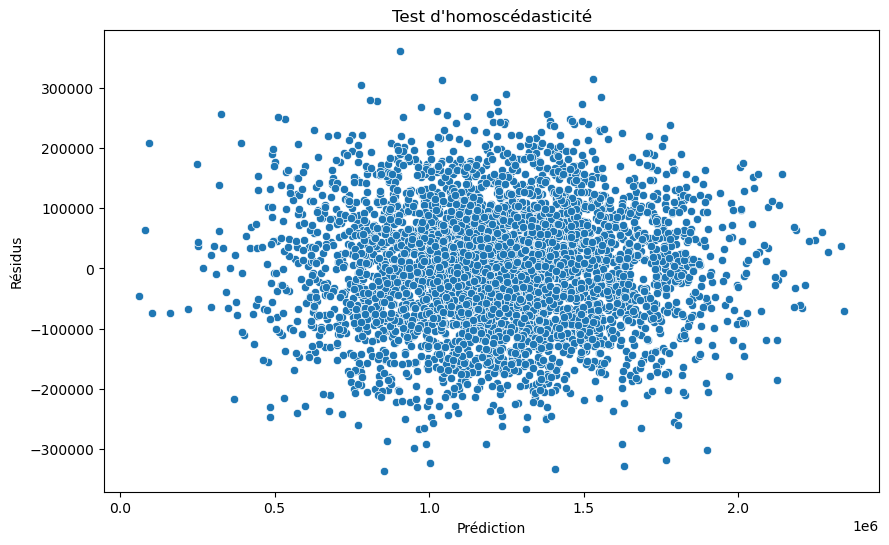

In [28]:
# Analyse graphique d'homoscédasticité
y_train_pred = lr_model.predict(sm.add_constant(x_train))
residuals = y_train- y_train_pred
plt.figure(figsize=(10,6))
sns.scatterplot(y_train_pred, residuals)
plt.xlabel("Prédiction")
plt.ylabel("Résidus")
plt.title("Test d\'homoscédasticité")
plt.show()

In [30]:
# Test de Breusch-Pagan
bp_test = sm.stats.diagnostic.het_breuschpagan(lr_model.resid, lr_model.model.exog)
print("Test de Breusch-Pagan: statistique = %f, p-values = %f" %(bp_test[0],bp_test[1]))

Test de Breusch-Pagan: statistique = 10.834002, p-values = 0.054772


### Vérification de la multicolinéarité

In [32]:
# Test de multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"]= x_train.columns
print(vif)

   VIF Factor                      features
0   29.448651              Avg. Area Income
1   27.244833           Avg. Area House Age
2   44.848333     Avg. Area Number of Rooms
3   14.753122  Avg. Area Number of Bedrooms
4   12.630031               Area Population


### Vérification de la normalité

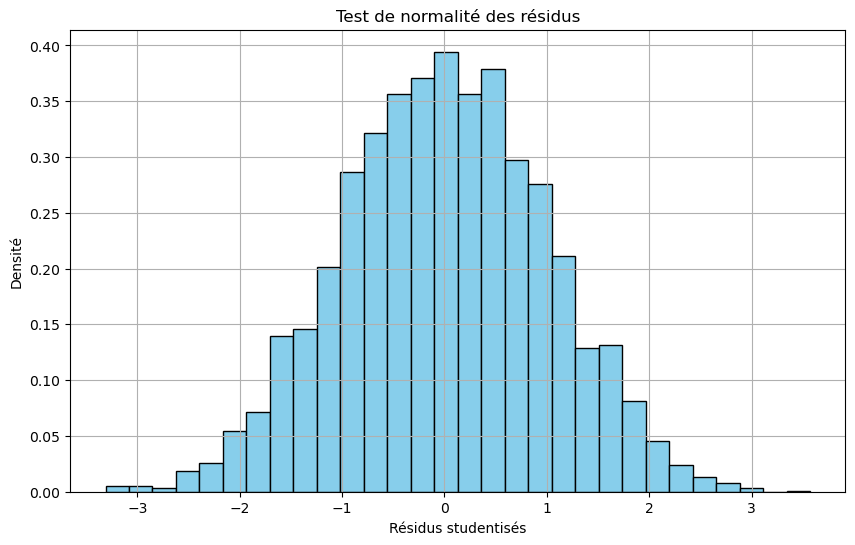

In [36]:
# Récupération des résidus studentisés internes
resid_norm = lr_model.get_influence().resid_studentized_internal

plt.figure(figsize=(10, 6))
plt.hist(resid_norm, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title("Test de normalité des résidus")
plt.xlabel("Résidus studentisés")
plt.ylabel("Densité")
plt.grid(True)
plt.show()

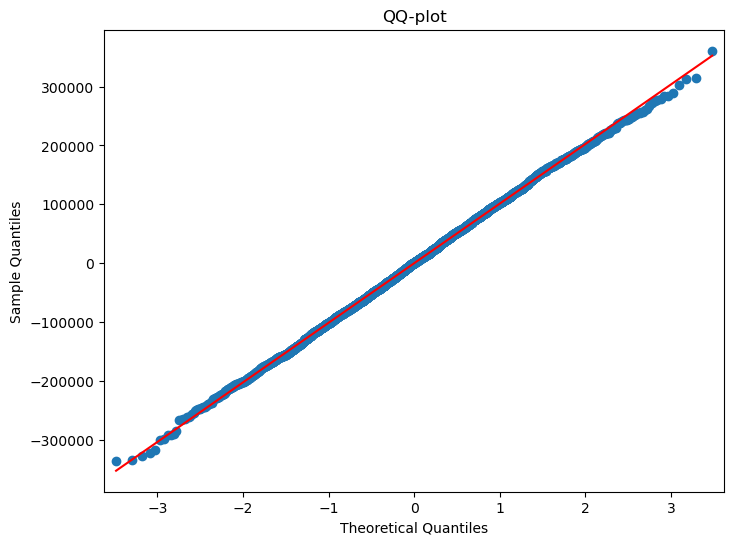

In [37]:
# QQ-plot
fig, ax= plt.subplots(figsize=(8,6))
sm.qqplot(residuals,line='s',ax=ax)
ax.set_title('QQ-plot')
plt.show()

In [38]:
import scipy.stats as stats

# Test de Shapiro-wilk
shapiro_test = stats.shapiro(residuals)

# Test de kolmogorov-Smirnov
ks_test = stats.kstest(residuals, 'norm')

# Mettre les résultats dans un DataFrame

df_normality = pd.DataFrame({
    'Test de normalité': ['Shapiro-wilk', 'Kolmogorov-Smirnov'],
    "Statistique": [shapiro_test.statistic, ks_test.statistic],
    "p-value": [shapiro_test.pvalue, ks_test.pvalue]
})

print(df_normality)

    Test de normalité  Statistique   p-value
0        Shapiro-wilk     0.999452  0.305096
1  Kolmogorov-Smirnov     0.503250  0.000000


### Vérification de l'autocorrélation

In [40]:
from statsmodels.stats.stattools import durbin_watson

# Test d'autocorrélation
dw_test = durbin_watson(lr_model.resid)
print("Test de Durbin-watson: statistique= %f" % dw_test)

Test de Durbin-watson: statistique= 1.968641


### Moyenne des termes d'erreur

In [41]:
residuals.mean()

-2.700719051063061e-09